## ch06. 결정트리
분류와 회귀에서 모두 사용이 가능(~.7까지 분류, 이후는 회귀에 대해 설명한다), 가장 큰 문제점은 **과대적합**의 문제. -> 하이퍼파라미터 튜닝이 중요해진다(혹은 가지치기 알고리즘을 사용할 수도 있다)
### 6.1.결정트리의 시각화

In [2]:
#학습
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,:2]#꽃잎의 길이와 너비
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)#학습

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [4]:
#시각화 
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

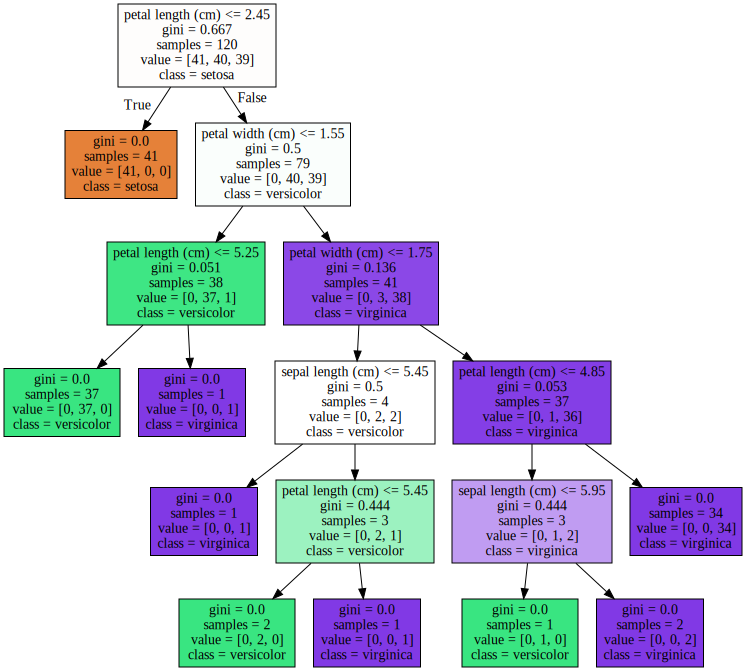

In [8]:
#이미지 확인
#이렇게 outfile이름으로 생성된 tree.dot의 모델을 Graphiz 모듈을 사용하여 시각화 가능하다
#단 설치시에 Graphviz 파일을 다운받아야 한다. 
import graphviz
#위에서 생성한 tree.dot파일을 Graphiz가 잃어서 jupyter상으로 나타내는 방법
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

## 예측하기

Text(4.05, 0.5, '(Depth=2)')

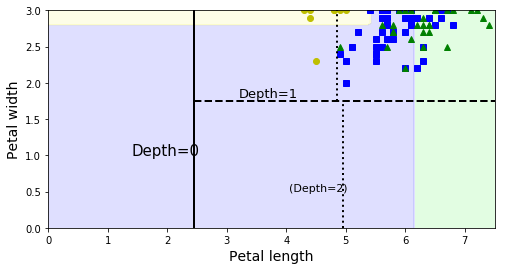

In [11]:
#결정경계확인하기(기준:gini)
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

### 6.3클래스확률 추정하기

In [13]:
#1이 될 확률 추정
tree_clf.predict_proba([[5,1.5]]) #(x1,x2)

array([[0.14285714, 0.71428571, 0.14285714]])

In [14]:
tree_clf.predict([[5,1.5]])#예측

array([1])

### 6.4. CART훈련 알고리즘

- sklearn에서의 결정트리 알고리즘은 CART알고리즘.
- 훈련셋을 하나의 특성 k, 임계값 tk로 나누기 위한 방법은
**크기에 따른 가중치가 적용된 가장 순수한 서브셋으로 나눌 수 있는 (k, tk)를 찾는다. (비용함수를 최소화하는 분기를 기준)**
- 중지조건(하이퍼파라미터튜닝)할떼까지 or 불순도가 없어질 떄까지 반복한다. 

### 6.6 지니 불순도 혹은 엔트로피?
기본적으로 측정기준으로 지니불순도를 사용하지만, 엔트로피 불순도를 사용할 수도 있습니다. <br>
엔트로피는 무질서함을 측정하는 척도.<br>
- 지니불순도는 log계산이 없으므로 속도가 더 빠름
- 엔트로피는 불순도를 낮추기 위해 각 클래스의 확률을 낮춘다(=균형있는 결과)

### 6.7. 규제 매개변수
- 결정트리는 훈련전에 파라미터가 정해지지 않는 비파라미터 모델
- max_depth, min_sample_split, mint_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features로 조절한다.  

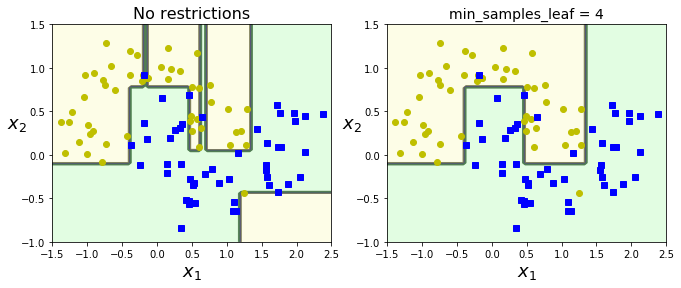

In [15]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()
#기본파라미터 사용시 과적합된 결과

제한없이 결정트리를 훈련하고, 불필요한 노드를 가지치기 하는 알고리즘의 경우(알파베타 가지치기방법) <br>
: 다음노드로 분리했을 때, 성능이 개선이 되었을 때, 계속 가지치기 하는 경우

### 6.8.회귀

In [16]:
# 다항식+노이즈값으로 랜덤값 생성
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [18]:
#회귀 적용
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [20]:
export_graphviz(tree_reg, out_file='tree.dot',impurity=True, filled=True)

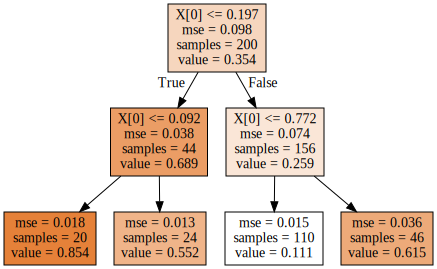

In [21]:
#이렇게 outfile이름으로 생성된 tree.dot의 모델을 Graphiz 모듈을 사용하여 시각화 가능하다
#단 설치시에 Graphviz 파일을 다운받아야 한다. 
import graphviz
#위에서 생성한 tree.dot파일을 Graphiz가 잃어서 jupyter상으로 나타내는 방법
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

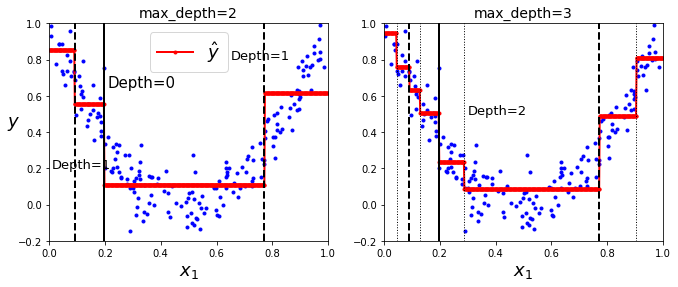

In [22]:
#회귀로 결정한 값 2차원으로 시각화 
#depth에 따라 비교
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

### 6.8.불안정성
결정트리의 문제점 <br>
1. 훈련세트의 회전에 민감하다 -> 차원축소로 해결
2. 훈련데이터에 있는 작은 변화에도 ㅂ